In [320]:
import pandas as pd
from datetime import datetime, timedelta
import random

# Parâmetros de configuração
num_interacoes = 20
num_ligacoes = 5

# Definir timestamps de início e fim da chamada
inicio_chamada = datetime(2023, 7, 12, 9, 0)
fim_chamada = datetime(2023, 7, 12, 10, 0)

# Gerar IDs de ligação
ids_ligacao = list(range(1, num_ligacoes + 1))

# Criar DataFrame de interações
df = pd.DataFrame(columns=['id_ligacao', 'falante', 'tempo_inicio', 'tempo_fim'])

for id_ligacao in ids_ligacao:
    # Gerar timestamps aleatórios dentro do intervalo da chamada
    timestamps = []
    for _ in range(num_interacoes):
        random_time = inicio_chamada + timedelta(seconds=random.randint(0, int((fim_chamada - inicio_chamada).total_seconds())))
        timestamps.append(random_time)

    # Selecionar apenas 5 timestamps aleatórios
    random_timestamps = random.sample(timestamps, num_interacoes // 2 * 2)

    # Criar dados para a ligação atual
    data = {
        'id_ligacao': [id_ligacao] * num_interacoes,
        'falante': ['Atendente', 'Cliente'] * (num_interacoes // 2),
        'tempo_inicio': random_timestamps,
        'tempo_fim': random_timestamps[1:] + [fim_chamada],
    }

    # Adicionar os dados ao DataFrame principal
    df = df.append(pd.DataFrame(data), ignore_index=True)

# Ordenar o DataFrame pelo ID da ligação
df = df.sort_values('id_ligacao')

# Reiniciar o índice
df = df.reset_index(drop=True)

# Exibição do DataFrame ordenado
print(df)


   id_ligacao    falante        tempo_inicio           tempo_fim
0           1  Atendente 2023-07-12 09:03:05 2023-07-12 09:17:43
1           1    Cliente 2023-07-12 09:59:06 2023-07-12 10:00:00
2           1  Atendente 2023-07-12 09:18:06 2023-07-12 09:59:06
3           1    Cliente 2023-07-12 09:15:45 2023-07-12 09:18:06
4           1  Atendente 2023-07-12 09:58:43 2023-07-12 09:15:45
..        ...        ...                 ...                 ...
95          5    Cliente 2023-07-12 09:49:25 2023-07-12 09:09:57
96          5  Atendente 2023-07-12 09:19:22 2023-07-12 09:49:25
97          5  Atendente 2023-07-12 09:12:09 2023-07-12 09:57:00
98          5  Atendente 2023-07-12 09:16:23 2023-07-12 09:12:27
99          5    Cliente 2023-07-12 09:57:00 2023-07-12 10:00:00

[100 rows x 4 columns]


/tmp/ipykernel_32/1393994421.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data), ignore_index=True)
/tmp/ipykernel_32/1393994421.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data), ignore_index=True)
/tmp/ipykernel_32/1393994421.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data), ignore_index=True)
/tmp/ipykernel_32/1393994421.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data), ignore_index=True)
/tmp/ipykernel_32/1393994421.py:38: FutureWarning: The frame.append method is deprecated and will be

In [321]:
import pandas as pd

# Obter as informações dos índices específicos
index_1 = 1
index_2 = 2

# Obter os tempos de início e fim dos índices específicos
tempo_inicio_1 = df.loc[index_1, 'tempo_inicio']
tempo_fim_1 = df.loc[index_1, 'tempo_fim']
tempo_inicio_2 = df.loc[index_2, 'tempo_inicio']
tempo_fim_2 = df.loc[index_2, 'tempo_fim']

# Calcular o tempo de espera entre os índices
tempo_espera = tempo_inicio_2 - tempo_fim_1

# Exibir o resultado
print(f"Tempo de espera entre os índices {index_1} e {index_2}: {tempo_espera}")


Tempo de espera entre os índices 1 e 2: -1 days +23:18:06


In [322]:
# def calcular_tempo_espera(df):
#     df['tempo_espera'] = (df['tempo_inicio'].shift(-1) - df['tempo_fim']).dt.total_seconds()

#     # Calcular o tempo total de espera para a mesma ligação
#     tempo_total_espera = df['tempo_espera'].sum()

#     # Calcular o percentual de espera em relação ao tempo total de espera
#     df['percentual_espera'] = (df['tempo_espera'] / tempo_total_espera) * 100
#     df['percentual_espera'] = df['percentual_espera'].abs()

#     return df


In [323]:
def calcular_tempo_espera(df):
    # Agrupar por id_ligacao
    grouped_df = df.groupby('id_ligacao')

    # Calcular o tempo de espera para cada ligação
    df['tempo_espera'] = (df.groupby('id_ligacao')['tempo_inicio'].shift(-1) - df['tempo_fim']).dt.total_seconds()

    # Converter para valores absolutos
    df['tempo_espera'] = df['tempo_espera'].abs()

    # Calcular o tempo total de espera para cada ligação
    df['tempo_total_espera'] = grouped_df['tempo_espera'].transform('sum')

    # Calcular o percentual de espera para cada chamada dentro da ligação
    df['percentual_espera'] = (df['tempo_espera'] / df['tempo_total_espera']) * 100

    # Normalizar os percentuais de espera para que a soma seja 100% dentro de cada ligação
    df['percentual_espera'] = df.groupby('id_ligacao')['percentual_espera'].apply(lambda x: x / x.sum() * 100)

    # Ajustar a precisão decimal do percentual de espera
    df['percentual_espera'] = df['percentual_espera'].round(2)

    # Verificar se houve sobreposição dos falantes
    df['sobreposicao_falantes'] = False
    df.loc[df['tempo_inicio'].shift(-1) < df['tempo_fim'], 'sobreposicao_falantes'] = True

    return df


In [324]:
df = calcular_tempo_espera(df)

/tmp/ipykernel_32/937613148.py:18: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df['percentual_espera'] = df.groupby('id_ligacao')['percentual_espera'].apply(lambda x: x / x.sum() * 100)


In [325]:
 df.loc[(df.id_ligacao == 1)].drop(columns=['tempo_total_espera'])

,id_ligacao,falante,tempo_inicio,tempo_fim,tempo_espera,percentual_espera,sobreposicao_falantes
0,1,Atendente,2023-07-12 09:03:05,2023-07-12 09:17:43,2483.0,9.45,False
1,1,Cliente,2023-07-12 09:59:06,2023-07-12 10:00:00,2514.0,9.57,True
2,1,Atendente,2023-07-12 09:18:06,2023-07-12 09:59:06,2601.0,9.90,True
3,1,Cliente,2023-07-12 09:15:45,2023-07-12 09:18:06,2437.0,9.28,False
4,1,Atendente,2023-07-12 09:58:43,2023-07-12 09:15:45,757.0,2.88,False
5,1,Cliente,2023-07-12 09:28:22,2023-07-12 09:58:43,86.0,0.33,True
6,1,Cliente,2023-07-12 09:57:17,2023-07-12 09:09:55,760.0,2.89,False
7,1,Atendente,2023-07-12 09:22:35,2023-07-12 09:57:17,172.0,0.65,True
8,1,Cliente,2023-07-12 09:54:25,2023-07-12 09:22:35,2176.0,8.28,False
9,1,Atendente,2023-07-12 09:58:51,2023-07-12 09:54:25,2670.0,10.17,True


In [326]:
 df.loc[(df.id_ligacao == 2)].drop(columns=['tempo_total_espera'])

,id_ligacao,falante,tempo_inicio,tempo_fim,tempo_espera,percentual_espera,sobreposicao_falantes
20,2,Atendente,2023-07-12 09:35:24,2023-07-12 09:43:38,0.0,0.00,False
21,2,Cliente,2023-07-12 09:43:38,2023-07-12 09:47:47,0.0,0.00,False
22,2,Atendente,2023-07-12 09:47:47,2023-07-12 09:17:21,0.0,0.00,False
23,2,Cliente,2023-07-12 09:17:21,2023-07-12 09:49:30,2280.0,10.25,True
24,2,Cliente,2023-07-12 09:11:30,2023-07-12 10:00:00,2274.0,10.22,True
25,2,Cliente,2023-07-12 09:22:06,2023-07-12 09:27:46,0.0,0.00,False
26,2,Atendente,2023-07-12 09:27:46,2023-07-12 09:11:30,1604.0,7.21,False
27,2,Cliente,2023-07-12 09:38:14,2023-07-12 09:35:24,846.0,3.80,False
28,2,Atendente,2023-07-12 09:49:30,2023-07-12 09:22:06,968.0,4.35,True
29,2,Atendente,2023-07-12 09:05:58,2023-07-12 09:38:14,999.0,4.49,False


In [327]:
 df.loc[(df.id_ligacao == 3)].drop(columns=['tempo_total_espera'])

,id_ligacao,falante,tempo_inicio,tempo_fim,tempo_espera,percentual_espera,sobreposicao_falantes
40,3,Atendente,2023-07-12 09:57:31,2023-07-12 09:49:51,0.0,0.00,False
41,3,Cliente,2023-07-12 09:49:51,2023-07-12 09:49:09,0.0,0.00,False
42,3,Atendente,2023-07-12 09:49:09,2023-07-12 09:23:29,0.0,0.00,False
43,3,Cliente,2023-07-12 09:23:29,2023-07-12 09:04:02,3275.0,21.50,False
44,3,Cliente,2023-07-12 09:58:37,2023-07-12 10:00:00,1642.0,10.78,True
45,3,Cliente,2023-07-12 09:32:38,2023-07-12 09:31:32,0.0,0.00,False
46,3,Atendente,2023-07-12 09:31:32,2023-07-12 09:58:37,1381.0,9.06,True
47,3,Cliente,2023-07-12 09:35:36,2023-07-12 09:57:31,3209.0,21.06,True
48,3,Atendente,2023-07-12 09:04:02,2023-07-12 09:32:38,1102.0,7.23,True
49,3,Atendente,2023-07-12 09:14:16,2023-07-12 09:35:36,771.0,5.06,True


In [328]:
# Criar tabela final sem os valores NaN
df_final_dropna = df.dropna().reset_index(drop=True)

# Exibir a tabela final sem os valores NaN
print(df_final_dropna)

   id_ligacao    falante        tempo_inicio           tempo_fim  \
0           1  Atendente 2023-07-12 09:03:05 2023-07-12 09:17:43   
1           1    Cliente 2023-07-12 09:59:06 2023-07-12 10:00:00   
2           1  Atendente 2023-07-12 09:18:06 2023-07-12 09:59:06   
3           1    Cliente 2023-07-12 09:15:45 2023-07-12 09:18:06   
4           1  Atendente 2023-07-12 09:58:43 2023-07-12 09:15:45   
..        ...        ...                 ...                 ...   
90          5  Atendente 2023-07-12 09:09:57 2023-07-12 09:41:41   
91          5    Cliente 2023-07-12 09:49:25 2023-07-12 09:09:57   
92          5  Atendente 2023-07-12 09:19:22 2023-07-12 09:49:25   
93          5  Atendente 2023-07-12 09:12:09 2023-07-12 09:57:00   
94          5  Atendente 2023-07-12 09:16:23 2023-07-12 09:12:27   

    tempo_espera  tempo_total_espera  percentual_espera  sobreposicao_falantes  
0         2483.0             26265.0               9.45                  False  
1         2514.0     

In [329]:
import matplotlib.pyplot as plt
import numpy as np

def plot_sobreposicao_falantes(df):
    # Iterar sobre as diferentes id_ligacao
    for id_ligacao in df['id_ligacao'].unique():
        # Filtrar o DataFrame para a ligação atual
        ligacao_df = df[df['id_ligacao'] == id_ligacao]

        # Configurar o gráfico
        fig, ax = plt.subplots(figsize=(10, 8))

        # Obter os valores únicos de tempo_inicio
        tempo_inicio_unique = ligacao_df['tempo_inicio'].unique()
        tempo_inicio_unique.sort()

        # Calcular a largura das barras
        bar_width = np.diff(tempo_inicio_unique).min() / 2

        # Plotar a sobreposição dos falantes
        ax.bar(ligacao_df['tempo_inicio'], ligacao_df['sobreposicao_falantes'], width=bar_width, align='center')

        # Configurar os eixos e rótulos
        ax.set_xlabel('Tempo de início')
        ax.set_ylabel('Sobreposição de falantes')
        ax.set_title(f'Ligação {id_ligacao}: Sobreposição de falantes')

        # Exibir o gráfico
        plt.show()


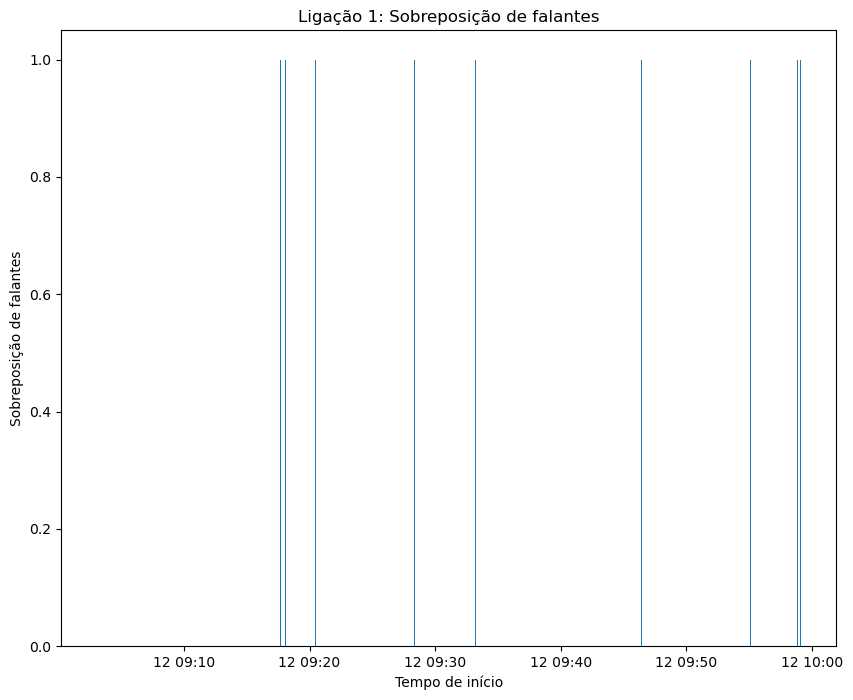

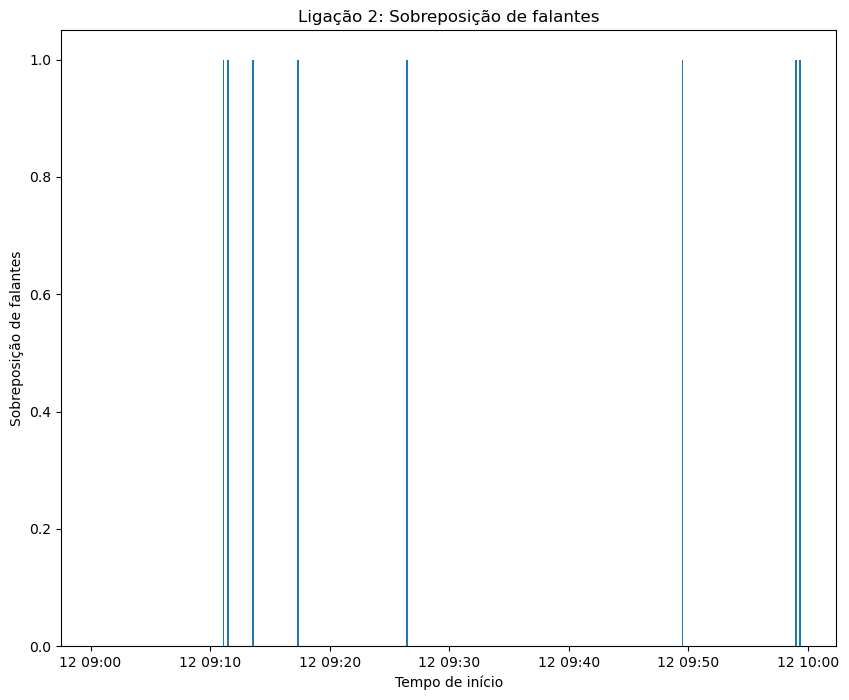

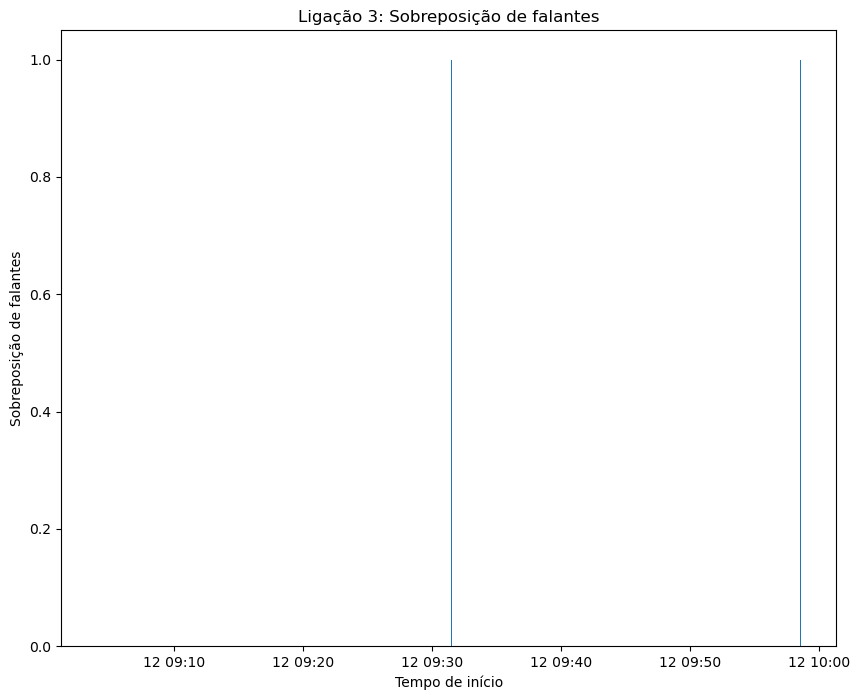

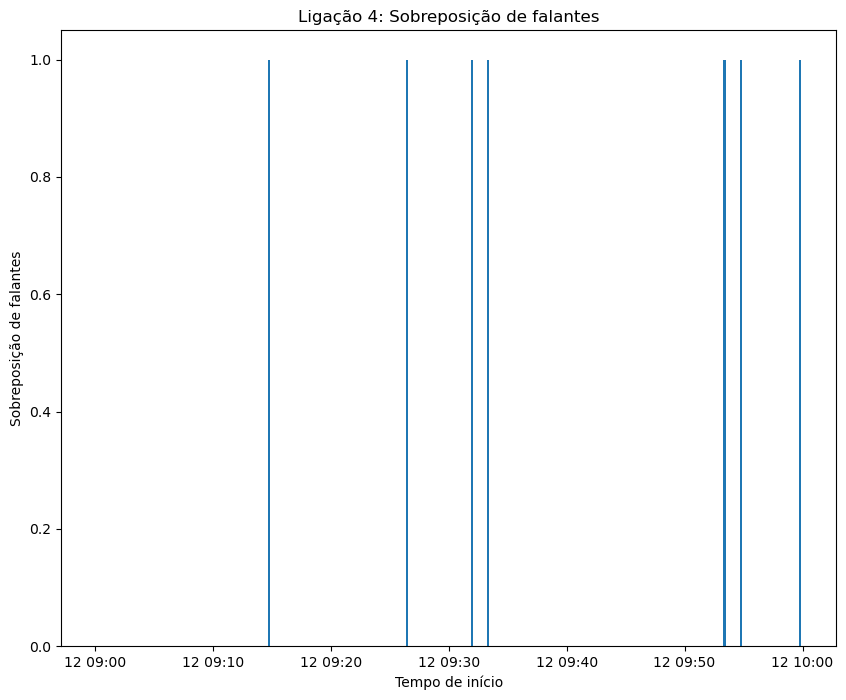

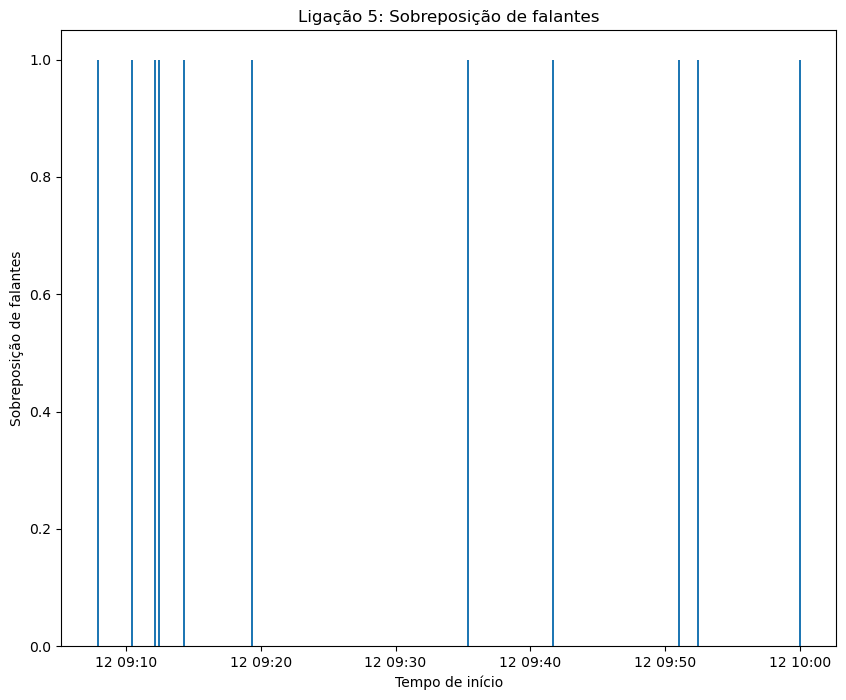

In [330]:
plot_sobreposicao_falantes(df)

# Tempo de espera Geral

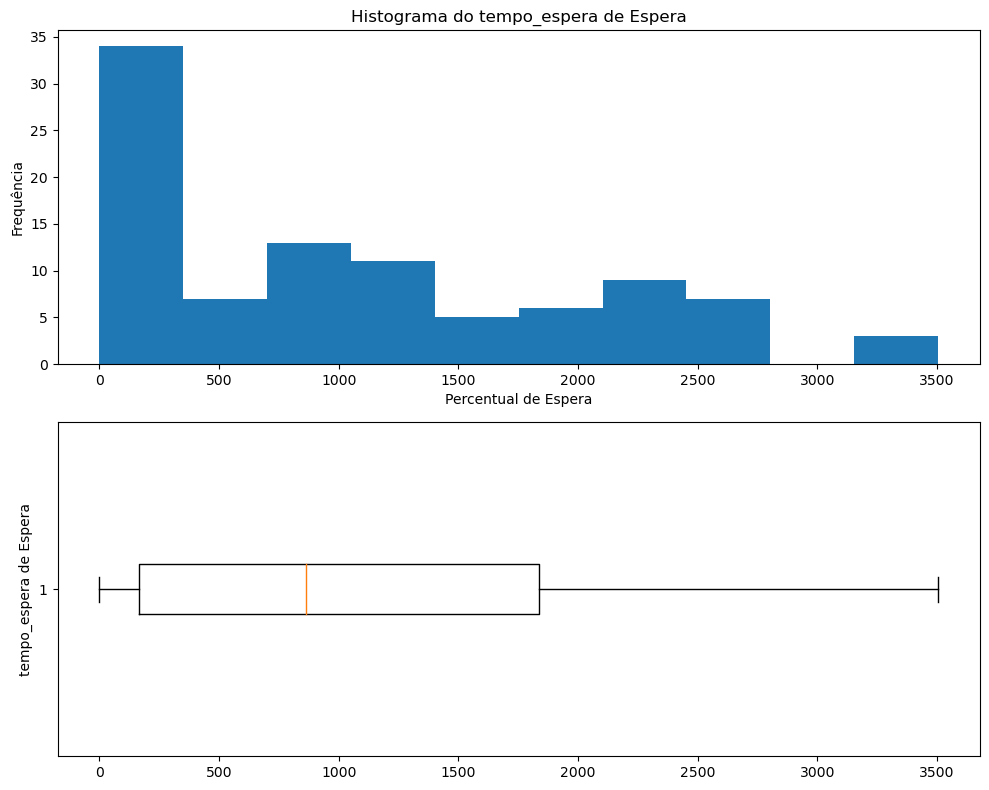

In [331]:
import matplotlib.pyplot as plt
import seaborn as sns

# Criar figura e eixos
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# Histograma
axs[0].hist(df_final_dropna['tempo_espera'], bins=10)
axs[0].set_xlabel('Percentual de Espera')
axs[0].set_ylabel('Frequência')
axs[0].set_title('Histograma do tempo_espera de Espera')

# Boxplot horizontal
axs[1].boxplot(df_final_dropna['tempo_espera'], vert=False)
axs[1].set_ylabel('tempo_espera de Espera')
axs[1].set_xlabel('')

# Ajustar espaçamento entre subplots
plt.tight_layout()

# Exibir os gráficos
plt.show()


# Percentual de Espera Geral

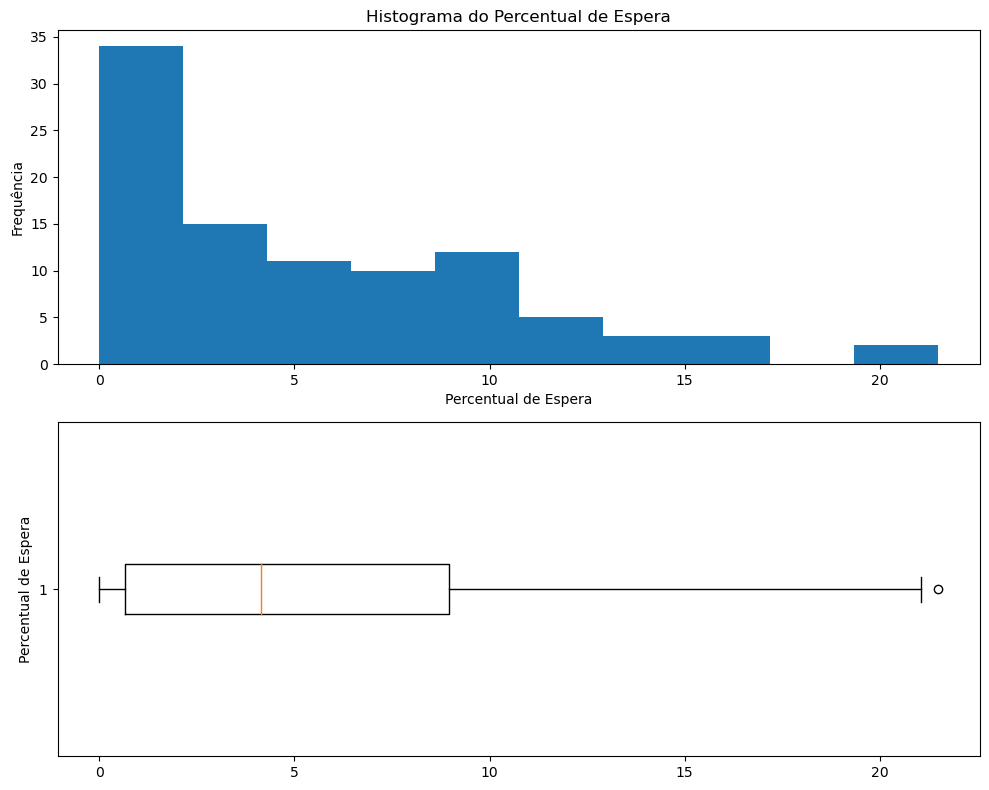

In [332]:
import matplotlib.pyplot as plt
import seaborn as sns

# Criar figura e eixos
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# Histograma
axs[0].hist(df_final_dropna['percentual_espera'], bins=10)
axs[0].set_xlabel('Percentual de Espera')
axs[0].set_ylabel('Frequência')
axs[0].set_title('Histograma do Percentual de Espera')

# Boxplot horizontal
axs[1].boxplot(df_final_dropna['percentual_espera'], vert=False)
axs[1].set_ylabel('Percentual de Espera')
axs[1].set_xlabel('')

# Ajustar espaçamento entre subplots
plt.tight_layout()

# Exibir os gráficos
plt.show()


# Tempo de Espera por ligação

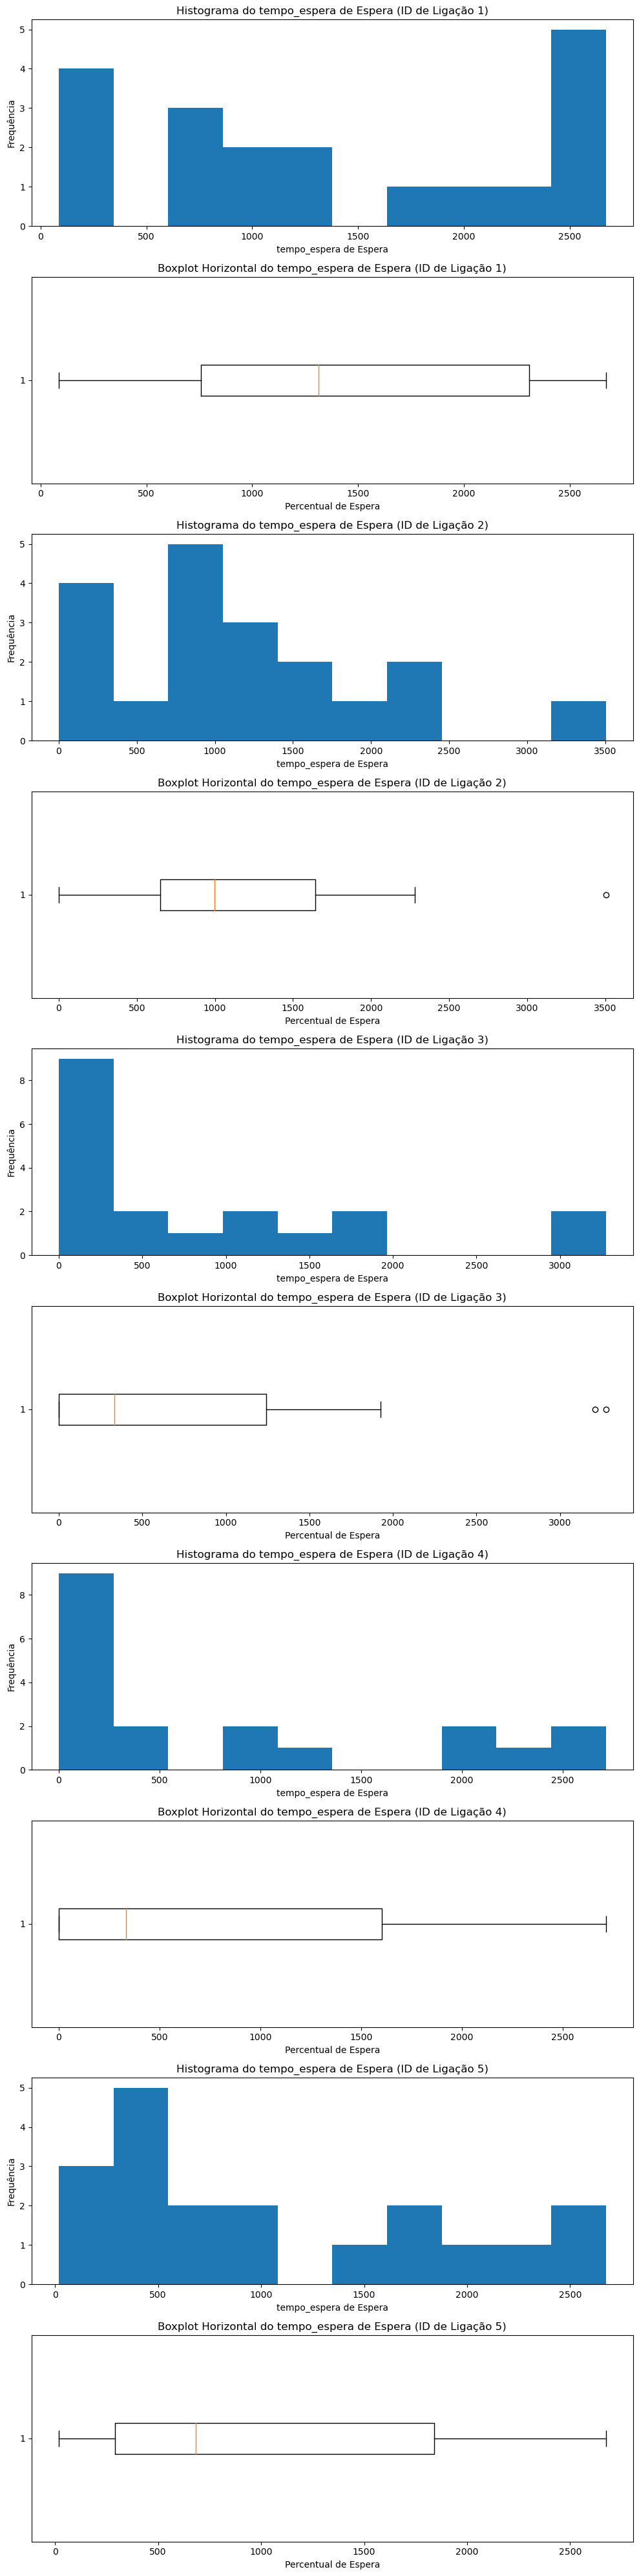

In [333]:
import matplotlib.pyplot as plt
import seaborn as sns

# Obter a lista de IDs de ligação únicos
ids_ligacao = df_final_dropna['id_ligacao'].unique()

# Criar figura e eixos
fig, axs = plt.subplots(2 * len(ids_ligacao), 1, figsize=(10, 8 * len(ids_ligacao)))

# Loop pelos IDs de ligação
for i, id_ligacao in enumerate(ids_ligacao):
    # Filtrar o DataFrame para o ID de ligação atual
    df_ligacao = df_final_dropna[df_final_dropna['id_ligacao'] == id_ligacao]
    
    # Histograma
    axs[2*i].hist(df_ligacao['tempo_espera'], bins=10)
    axs[2*i].set_xlabel('tempo_espera de Espera')
    axs[2*i].set_ylabel('Frequência')
    axs[2*i].set_title(f'Histograma do tempo_espera de Espera (ID de Ligação {id_ligacao})')

    # Boxplot horizontal
    axs[2*i+1].boxplot(df_ligacao['tempo_espera'], vert=False)
    axs[2*i+1].set_xlabel('Percentual de Espera')
    axs[2*i+1].set_ylabel('')
    axs[2*i+1].set_title(f'Boxplot Horizontal do tempo_espera de Espera (ID de Ligação {id_ligacao})')

# Ajustar espaçamento entre subplots
plt.tight_layout()

# Exibir os gráficos
plt.show()


# Percentual de espera por ligação

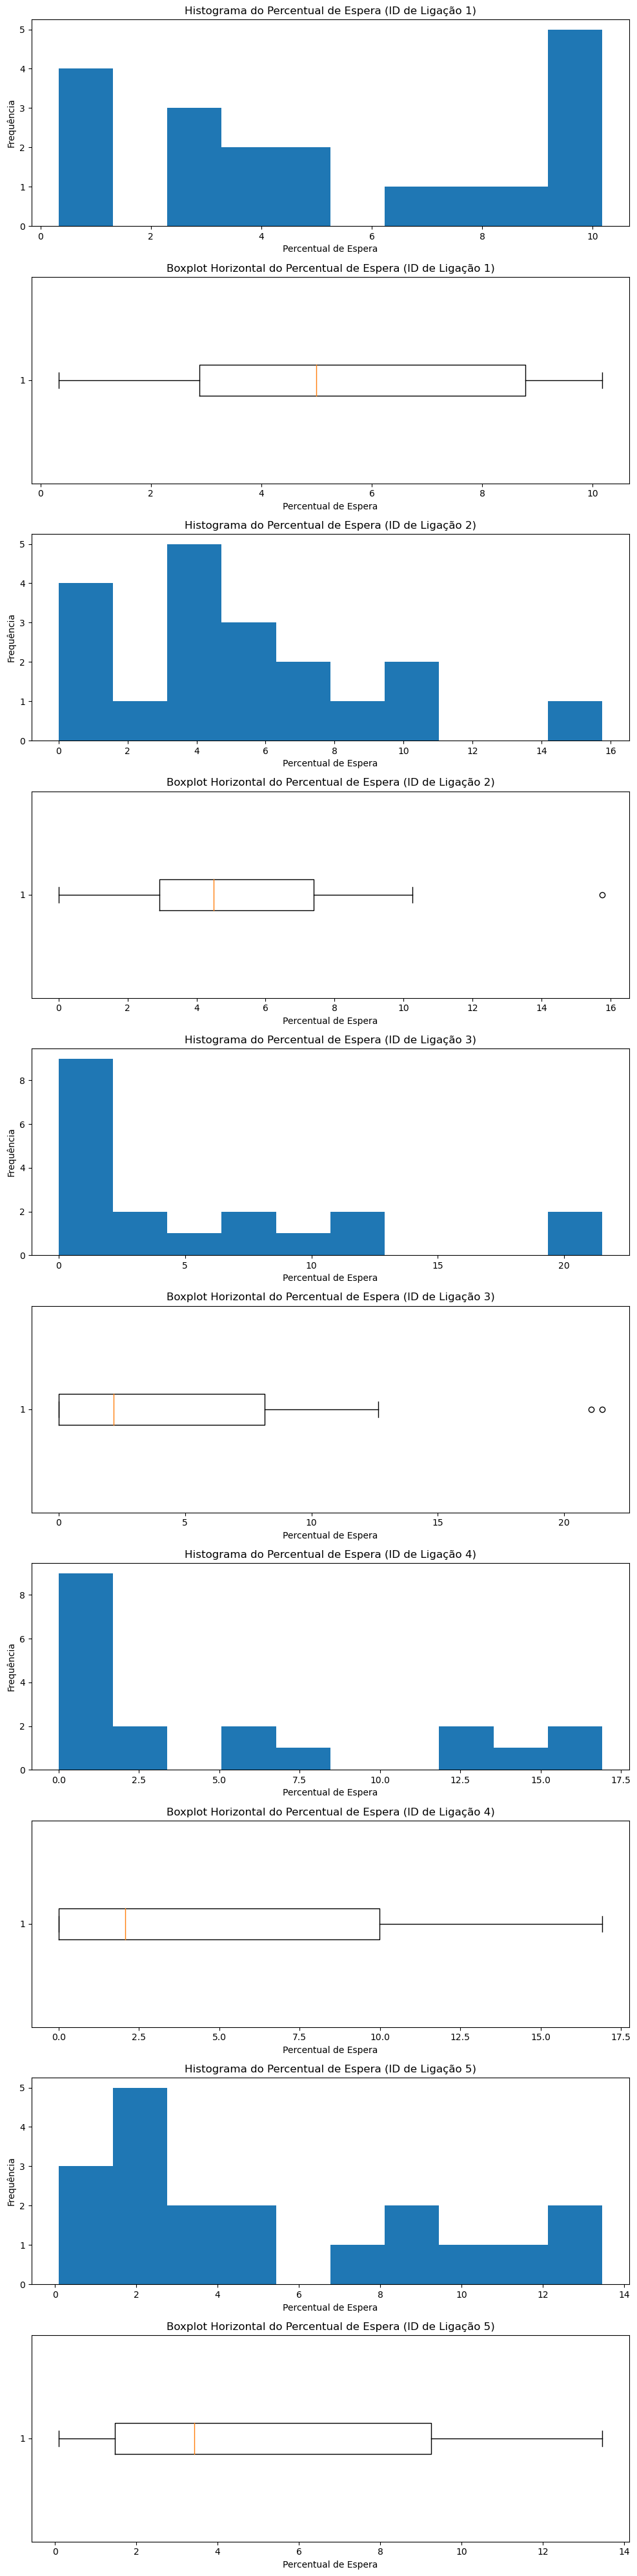

In [334]:
import matplotlib.pyplot as plt
import seaborn as sns

# Obter a lista de IDs de ligação únicos
ids_ligacao = df_final_dropna['id_ligacao'].unique()

# Criar figura e eixos
fig, axs = plt.subplots(2 * len(ids_ligacao), 1, figsize=(10, 8 * len(ids_ligacao)))

# Loop pelos IDs de ligação
for i, id_ligacao in enumerate(ids_ligacao):
    # Filtrar o DataFrame para o ID de ligação atual
    df_ligacao = df_final_dropna[df_final_dropna['id_ligacao'] == id_ligacao]
    
    # Histograma
    axs[2*i].hist(df_ligacao['percentual_espera'], bins=10)
    axs[2*i].set_xlabel('Percentual de Espera')
    axs[2*i].set_ylabel('Frequência')
    axs[2*i].set_title(f'Histograma do Percentual de Espera (ID de Ligação {id_ligacao})')

    # Boxplot horizontal
    axs[2*i+1].boxplot(df_ligacao['percentual_espera'], vert=False)
    axs[2*i+1].set_xlabel('Percentual de Espera')
    axs[2*i+1].set_ylabel('')
    axs[2*i+1].set_title(f'Boxplot Horizontal do Percentual de Espera (ID de Ligação {id_ligacao})')

# Ajustar espaçamento entre subplots
plt.tight_layout()

# Exibir os gráficos
plt.show()


In [335]:
def generate_readme(df):
    # Abrir o arquivo README.md em modo de escrita
    with open('README.md', 'w') as f:
        # Escrever o título do projeto
        f.write('# Projeto de Análise de Tempo de Espera\n\n')

        # Escrever a descrição do projeto
        f.write('Este projeto analisa o tempo de espera entre interações em uma chamada telefônica.\n\n')

        # Escrever informações sobre o DataFrame
        f.write('## DataFrame\n\n')
        f.write('O DataFrame utilizado contém as seguintes colunas:\n\n')
        f.write('- `id_ligacao`: ID da ligação telefônica\n')
        f.write('- `falante`: Papel do participante da chamada (Atendente ou Cliente)\n')
        f.write('- `tempo_inicio`: Tempo de início da interação\n')
        f.write('- `tempo_fim`: Tempo de fim da interação\n')
        f.write('- `tempo_espera`: Tempo de espera entre as interações\n')
        f.write('- `percentual_espera`: Percentual de espera em relação ao tempo total de espera\n\n')

        # Escrever informações sobre o cálculo do tempo de espera
        f.write('## Cálculo do Tempo de Espera\n\n')
        f.write('O tempo de espera é calculado utilizando a função `calcular_tempo_espera` que realiza as seguintes etapas:\n\n')
        f.write('- Calcula o tempo de espera entre as interações\n')
        f.write('- Calcula o tempo total de espera para a mesma ligação\n')
        f.write('- Calcula o percentual de espera em relação ao tempo total de espera\n\n')

        # Exibir o DataFrame resultante
        f.write('## DataFrame Resultante\n\n')
        f.write('Aqui estão as primeiras linhas do DataFrame resultante:\n\n')
        f.write('```python\n')
        f.write(df.head().to_string(index=False))
        f.write('\n```\n')

        # Escrever informações adicionais, se necessário
        f.write('## Informações Adicionais\n\n')
        f.write('Adicione informações adicionais sobre o projeto ou análises realizadas aqui.\n')

    # Mensagem de confirmação
    print('Arquivo README.md gerado com sucesso!')

# Gerar o arquivo README.md com base no DataFrame resultante
generate_readme(df_final_dropna)


Arquivo README.md gerado com sucesso!
